In [1]:
# # !pip install tensorflow
!pip install scikeras
# # !pip install darts

In [1]:
# import sklearn
# import scikeras

# print("sklearn:", sklearn.__version__)
# print("scikeras:", scikeras.__version__)

#!pip install --force-reinstall scikit-learn==1.4.2


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# import the library
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from darts import TimeSeries

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten, Input, Attention, BatchNormalization
from keras.optimizers import Adam

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [44]:
df = pd.read_csv("/content/drive/My Drive/Research UG/codes/DataSet/cabbage_full.csv")
df.head()

,Date,Cluster01,Cluster02,Cluster03,Cluster04,Cluster05,predicted_class,probability_neutral,probability_positive,probability_negative,cabbage,Badulla_precipitation_sum,Kandy_precipitation_sum,Nuwara Eliya_precipitation_sum,Badulla_relative_humidity_2m_mean,Kandy_relative_humidity_2m_mean,Nuwara Eliya_relative_humidity_2m_mean,Badulla_temperature_2m_mean,Kandy_temperature_2m_mean,Nuwara Eliya_temperature_2m_mean
0,5/18/2015,0,0,1,0,0,1.333333,0.376025,0.061972,0.562002,44.0,0.6,1.2,2.3,82.904780,84.033430,87.85563,24.240168,24.389250,18.327750
1,5/19/2015,0,1,0,1,0,0.000000,0.659898,0.117692,0.222410,53.0,0.2,1.1,2.4,82.397110,84.773580,90.20755,24.542250,24.401749,18.323584
2,5/20/2015,0,1,0,0,0,0.000000,0.936986,0.021677,0.041336,50.0,0.0,0.0,1.7,81.960870,83.902565,88.49059,24.865166,24.695498,18.856915
3,5/21/2015,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,53.0,0.0,0.4,1.5,78.541115,83.376490,88.16787,25.356833,24.810081,19.052750
4,5/22/2015,2,1,0,0,0,1.000000,0.322806,0.472620,0.204574,53.0,0.4,0.1,2.8,79.194310,82.782790,88.71619,25.288088,24.872581,19.186085


In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['month'] = df.index.month
df['day'] = df.index.day


df.head()
# df.isna().sum()
#no missing values

# series = TimeSeries.from_dataframe(df, 'Date', 'cabbage')
# series.head()
# series.plot()

,Cluster01,Cluster02,Cluster03,Cluster04,Cluster05,predicted_class,probability_neutral,probability_positive,probability_negative,cabbage,...,Kandy_precipitation_sum,Nuwara Eliya_precipitation_sum,Badulla_relative_humidity_2m_mean,Kandy_relative_humidity_2m_mean,Nuwara Eliya_relative_humidity_2m_mean,Badulla_temperature_2m_mean,Kandy_temperature_2m_mean,Nuwara Eliya_temperature_2m_mean,month,day
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-18,0,0,1,0,0,1.333333,0.376025,0.061972,0.562002,44.0,...,1.2,2.3,82.904780,84.033430,87.85563,24.240168,24.389250,18.327750,5,18
2015-05-19,0,1,0,1,0,0.000000,0.659898,0.117692,0.222410,53.0,...,1.1,2.4,82.397110,84.773580,90.20755,24.542250,24.401749,18.323584,5,19
2015-05-20,0,1,0,0,0,0.000000,0.936986,0.021677,0.041336,50.0,...,0.0,1.7,81.960870,83.902565,88.49059,24.865166,24.695498,18.856915,5,20
2015-05-21,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,53.0,...,0.4,1.5,78.541115,83.376490,88.16787,25.356833,24.810081,19.052750,5,21
2015-05-22,2,1,0,0,0,1.000000,0.322806,0.472620,0.204574,53.0,...,0.1,2.8,79.194310,82.782790,88.71619,25.288088,24.872581,19.186085,5,22


In [46]:
# correlation analysis
from scipy.stats import spearmanr

features = df.columns
corr_matrix = df[features].corr(method='spearman')
print(corr_matrix['cabbage'].sort_values(ascending=False))


cabbage                                   1.000000
Cluster01                                 0.277522
Nuwara Eliya_relative_humidity_2m_mean    0.174473
Kandy_relative_humidity_2m_mean           0.121343
Cluster04                                 0.108341
month                                     0.104833
Badulla_temperature_2m_mean               0.082110
probability_positive                      0.076110
probability_neutral                       0.067291
Nuwara Eliya_precipitation_sum            0.065350
Kandy_precipitation_sum                   0.052328
Cluster03                                 0.044025
Badulla_precipitation_sum                 0.020923
probability_negative                      0.017595
predicted_class                           0.010762
day                                       0.010364
Badulla_relative_humidity_2m_mean        -0.033480
Cluster02                                -0.043652
Kandy_temperature_2m_mean                -0.063810
Nuwara Eliya_temperature_2m_mea

# Deep Learning

## Tomorrow Price

In [47]:
def df_to_x_y(df, window_size=180,col_index = 0):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][col_index]
        y.append(label)
    return np.array(X), np.array(y)

In [48]:
# column index that we interest variable
col_index = df.columns.get_loc("cabbage")

X, y = df_to_x_y(df, window_size=30,col_index = col_index)

print(X.shape)
print(y.shape)

# Train/test split (80% train, 20% test)
split = int(len(X) * 0.8)

X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

print(" Shape of Train/Test ")
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}")
print(f"X_test Shape : {X_test.shape}")
print(f"y_test Shape : {y_test.shape}")

(3759, 30, 21)
(3759,)
 Shape of Train/Test 
X_train Shape : (3007, 30, 21)
y_train Shape : (3007,)
X_test Shape : (752, 30, 21)
y_test Shape : (752,)


In [49]:
# Reshape for scaling (samples * timesteps, features)
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
X_test_2d = X_test.reshape(-1, X_test.shape[-1])

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled_2d = scaler.fit_transform(X_train_2d)

# Transform test data using training parameters
X_test_scaled_2d = scaler.transform(X_test_2d)

# Reshape back to original format
X_train = X_train_scaled_2d.reshape(X_train.shape)
X_test = X_test_scaled_2d.reshape(X_test.shape)

print("After scaling:")
print(f"X_train_scaled Shape : {X_train.shape}")
print(f"X_test_scaled Shape : {X_test.shape}")

After scaling:
X_train_scaled Shape : (3007, 30, 21)
X_test_scaled Shape : (752, 30, 21)


## LSTM Model

In [24]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

def DL_Model(activation = 'relu', neurons = 50, optimizer = 'adam'):
  model = Sequential()
  model.add(LSTM(neurons, activation = activation, input_shape = (X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation = "linear"))
  model.compile(loss = 'mse', optimizer = optimizer)
  return model

# create model
model = KerasRegressor(model = DL_Model, activation="relu", neurons = 25, optimizer = "adam", batch_size=32, epochs=100,  verbose = 0)

# define grid search parameters
activation = ["relu"]
neurons = [32, 64, 128]
optimizer = ["adam"]
batch_size = [32, 64]
epochs = [50,100]

param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer, batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = tscv)
grid_result = grid.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [  -1.59436277   -5.64717733   -3.43267384           nan  -20.05322381
 -189.3240884    -3.22411638  -89.30189317   -3.42461178  -10.90624367
   -3.32626415   -2.75036364]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
best_params = grid_result.best_params_
print("Best Parameters", best_params)
best_score = grid_result.best_score_
print("Best Score", best_score)

best_model = grid_result.best_estimator_
best_model.model_.summary()

Best Parameters {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'neurons': 32, 'optimizer': 'adam'}
Best Score -1.5943627734491461


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,069 (78.40 KB)

 Trainable params: 6,689 (26.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,380 (52.27 KB)

In [27]:
best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Evaluation
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train metrics
mse_train, rmse_train, mae_train, r2_train = regression_metrics(y_train, y_pred_train)
mape_train = mape(y_train, y_pred_train)

# Test metrics
mse_test, rmse_test, mae_test, r2_test = regression_metrics(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)

metrics_table = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MSE": [mse_train, mse_test],
    "RMSE": [rmse_train, rmse_test],
    "MAE": [mae_train, mae_test],
    "R2": [r2_train, r2_test],
    "MAPE (%)": [mape_train, mape_test],
})

print(metrics_table)

  Dataset           MSE        RMSE         MAE        R2   MAPE (%)
0   Train   6531.369083   80.816886   60.149988 -0.785978  76.121188
1    Test  26887.082536  163.972810  141.040707 -1.291289  71.023675


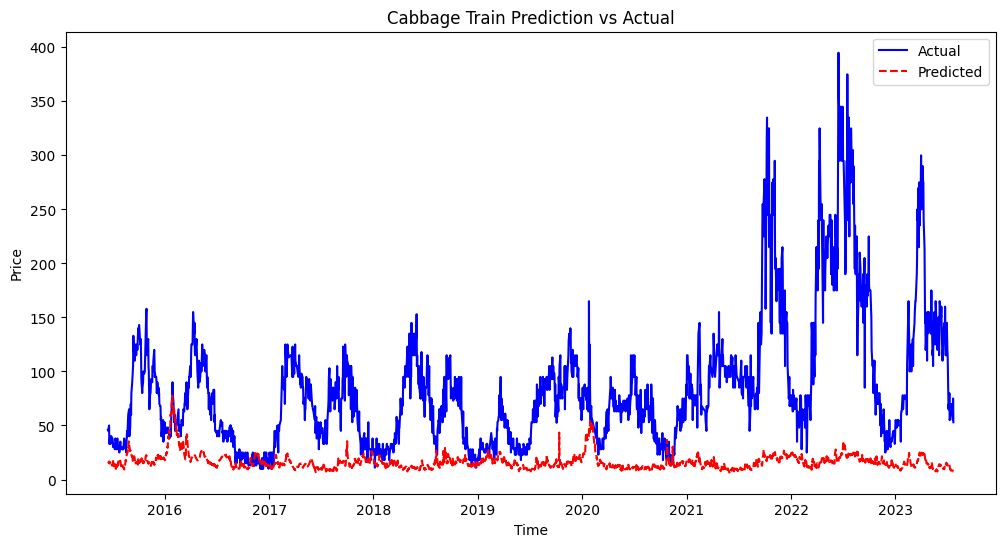

In [15]:
train_index = df.index[30:split+30]

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(train_index, y_train, label='Actual', color='blue')
plt.plot(train_index, y_pred_train, label='Predicted', color='red', linestyle='--')
plt.title('Cabbage Train Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (800,) and (740,)

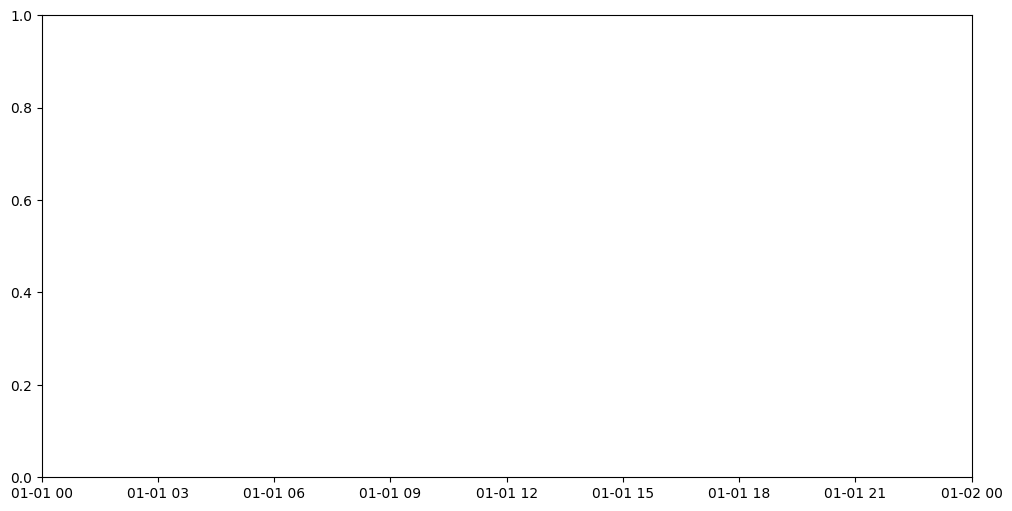

In [16]:
test_index = df.index[split+30:]

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(test_index, y_test, label='Actual', color='blue')
plt.plot(test_index, y_pred_test, label='Predicted', color='red', linestyle='--')
plt.title('Cabbage Test Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


##CNN +  LSTM  Model

In [10]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

def DL_Model(activation = 'relu', neurons = 50, optimizer = 'adam', filters = 32):
  model = Sequential()

  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(MaxPooling1D(pool_size=2))

  model.add(LSTM(neurons, activation = activation))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation = "linear"))
  model.compile(loss = 'mse', optimizer = optimizer)
  return model

# create model
model = KerasRegressor(model = DL_Model, activation="relu", neurons = 25, optimizer = "adam", batch_size=32, epochs=100,  verbose = 0)

# define grid search parameters
activation = ["relu", "tanh"]
neurons = [32, 64, 128]
optimizer = ["adam","rmsprop"]
batch_size = [32, 64]
epochs = [50, 100]


param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer, batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = tscv)
grid_result = grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [139]:
best_params = grid_result.best_params_
print("Best Parameters", best_params)
best_score = grid_result.best_score_
print("Best Score", best_score)

# Best Parameters {'activation': 'relu', 'batch_size': 30, 'epochs': 100, 'neurons': 64, 'optimizer': 'adam'}
# Best Score 0.951452490228515

Best Parameters {'activation': 'relu', 'batch_size': 30, 'epochs': 50, 'neurons': 64, 'optimizer': 'adam'}
Best Score 0.8258517827540587


In [50]:
# best_model = grid_result.best_estimator_
# best_model.model_.summary()

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same',  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(64, activation = 'relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 30, 64)         │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,185 (145.25 KB)

 Trainable params: 37,185 (145.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=30,
    shuffle=False,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

best_model = model

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 3861.8882
Epoch 2/100
 11/101 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1696.3182

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1477.2240
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1600.0441
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1477.4877
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1141.0494
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 845.4459
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 606.3184
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 550.7246
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 516.0847
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 482.6293
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 455.2462
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 436.2412
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 413.5818
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 403.6669
Epoch 15/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 368.4529
Epoch 16

In [39]:
# Evaluation
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train metrics
mse_train, rmse_train, mae_train, r2_train = regression_metrics(y_train, y_pred_train)
mape_train = mape(y_train, y_pred_train)

# Test metrics
mse_test, rmse_test, mae_test, r2_test = regression_metrics(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)

metrics_table = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MSE": [mse_train, mse_test],
    "RMSE": [rmse_train, rmse_test],
    "MAE": [mae_train, mae_test],
    "R2": [r2_train, r2_test],
    "MAPE (%)": [mape_train, mape_test],
})

print(metrics_table)

  Dataset          MSE       RMSE        MAE        R2   MAPE (%)
0   Train   468.218426  21.638355  13.423206  0.871574  93.655589
1    Test  3839.869495  61.966681  44.601348  0.674393  61.866314


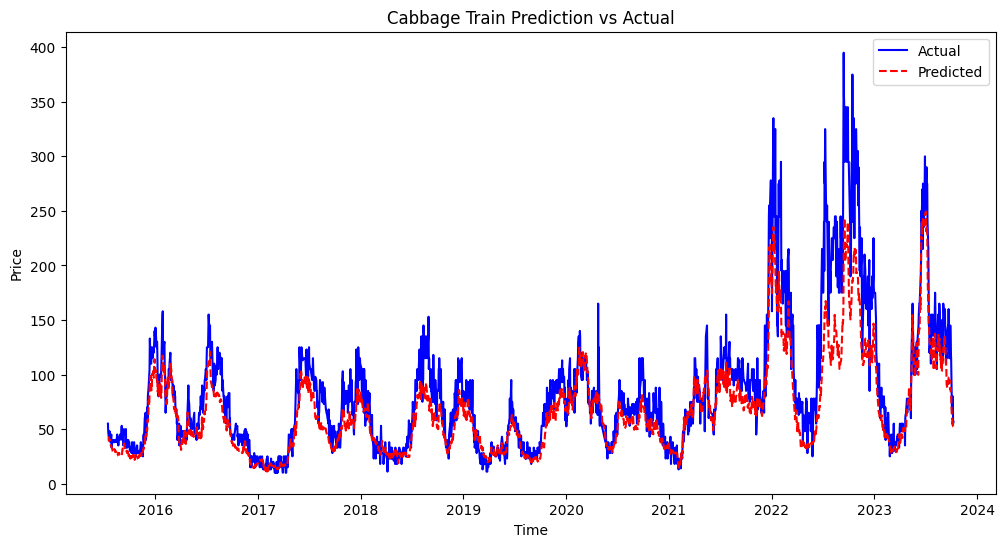

In [171]:
train_index = df.index[60:split+60]

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(train_index, y_train, label='Actual', color='blue')
plt.plot(train_index, y_pred_train, label='Predicted', color='red', linestyle='--')
plt.title('Cabbage Train Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

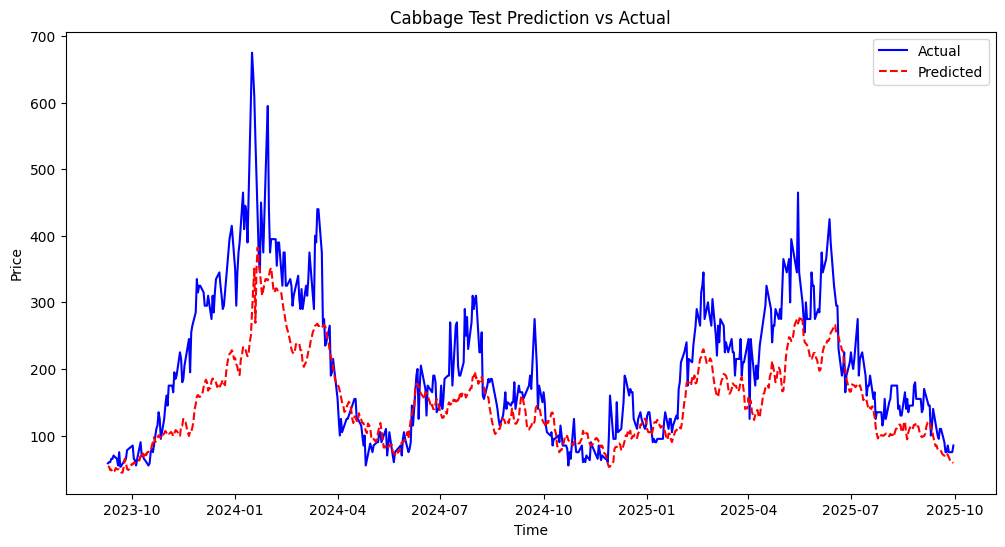

In [172]:
test_index = df.index[split+30:]

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(test_index, y_test, label='Actual', color='blue')
plt.plot(test_index, y_pred_test, label='Predicted', color='red', linestyle='--')
plt.title('Cabbage Test Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## LSTM ATTENTION

In [154]:
inputs = keras.Input(shape=(X_train.shape[1], X_train.shape[2]))

x = LSTM(128, return_sequences=True)(inputs)
x = Attention()([x, x])

outputs = Dense(1, activation='relu')(x[:,-1,:])

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "functional_106"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 30, 19)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_26 (LSTM)      │ (None, 30, 128)   │     75,776 │ input_layer_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_6         │ (None, 30, 128)   │          0 │ lstm_26[0][0],    │
│ (Attention)         │                   │            │ lstm_26[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 128)       │          0 │ attention_6[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1)         │        129 │ get_item_4[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 75,905 (296.50 KB)

 Trainable params: 75,905 (296.50 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
import random

random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=30,
    shuffle=False,
    callbacks=[EarlyStopping(patience=30, restore_best_weights=True)],
    verbose=1
)

best_model = model

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5142.8550
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3018.4138
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 2304.9902
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1913.4547
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1681.7356
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1554.7584
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1497.2134
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 1484.6206
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1501.4833
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1528.1660
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1547.5632
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 1582.4778
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1598.7052
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - los

In [156]:
# Evaluation
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train metrics
mse_train, rmse_train, mae_train, r2_train = regression_metrics(y_train, y_pred_train)
mape_train = mape(y_train, y_pred_train)

# Test metrics
mse_test, rmse_test, mae_test, r2_test = regression_metrics(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)

metrics_table = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MSE": [mse_train, mse_test],
    "RMSE": [rmse_train, rmse_test],
    "MAE": [mae_train, mae_test],
    "R2": [r2_train, r2_test],
    "MAPE (%)": [mape_train, mape_test],
})

print(metrics_table)

  Dataset          MSE       RMSE        MAE        R2    MAPE (%)
0   Train   102.345259  10.116583   5.662721  0.971859  105.605064
1    Test  3625.433178  60.211570  29.770453  0.691872   63.723795


In [40]:
# pip install lime

In [81]:
features = ['Cluster01', 'Cluster02', 'Cluster03', 'Cluster04', 'Cluster05',
       'predicted_class', 'probability_neutral', 'probability_positive',
       'probability_negative','Badulla_precipitation_sum',
       'Kandy_precipitation_sum', 'Nuwara Eliya_precipitation_sum',
       'Badulla_relative_humidity_2m_mean', 'Kandy_relative_humidity_2m_mean',
       'Nuwara Eliya_relative_humidity_2m_mean', 'Badulla_temperature_2m_mean',
       'Kandy_temperature_2m_mean', 'Nuwara Eliya_temperature_2m_mean']